Load packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [4]:
train.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


Determine missingness

In [5]:
country_grp = pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 )
country_grp = country_grp.groupby('country')['sales_na'].agg(['count','sum'])

# sns.heatmap(country_grp.to_frame(), cmap='coolwarm')    # heatmap of missing values in 'num_sold' column

In [6]:
country_grp 

,count,sum
country,,
Canada,38355,4246
Finland,38355,0
Italy,38355,0
Kenya,38355,4625
Norway,38355,0
Singapore,38355,0


In [7]:
product_grp = pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 )
product_grp = product_grp.groupby('product')['sales_na'].agg(['count','sum'])
product_grp

,count,sum
product,,
Holographic Goose,46026,8806
Kaggle,46026,0
Kaggle Tiers,46026,0
Kerneler,46026,64
Kerneler Dark Mode,46026,1


In [8]:
date_grp = pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 )
date_grp = date_grp.groupby('date')['sales_na'].agg(['count','sum'])
date_grp

,count,sum
date,,
2010-01-01,90,2
2010-01-02,90,2
2010-01-03,90,2
2010-01-04,90,3
2010-01-05,90,3
...,...,...
2016-12-27,90,2
2016-12-28,90,2
2016-12-29,90,2


In [9]:
store_grp = pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 )
store_grp = store_grp.groupby('store')['sales_na'].agg(['count','sum'])
store_grp

,count,sum
store,,
Discount Stickers,76710,5179
Premium Sticker Mart,76710,1026
Stickers for Less,76710,2666


In [10]:
country_store_grp = pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 )
country_store_grp = country_store_grp.groupby(['country','store','product'])['sales_na'].agg(['count','sum'])
country_store_grp[country_store_grp['sum'] > 0]

count   sum
country store                product                        
Canada  Discount Stickers    Holographic Goose    2557  2557
                             Kerneler             2557     1
        Premium Sticker Mart Holographic Goose    2557   380
        Stickers for Less    Holographic Goose    2557  1308
Kenya   Discount Stickers    Holographic Goose    2557  2557
                             Kerneler             2557    63
                             Kerneler Dark Mode   2557     1
        Premium Sticker Mart Holographic Goose    2557   646
        Stickers for Less    Holographic Goose    2557  1358

In [11]:
train['date'] = pd.to_datetime(train['date'])

In [12]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['dayofyear'] = train['date'].dt.dayofyear

In [13]:
train['store'].unique()

array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

In [14]:
train['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

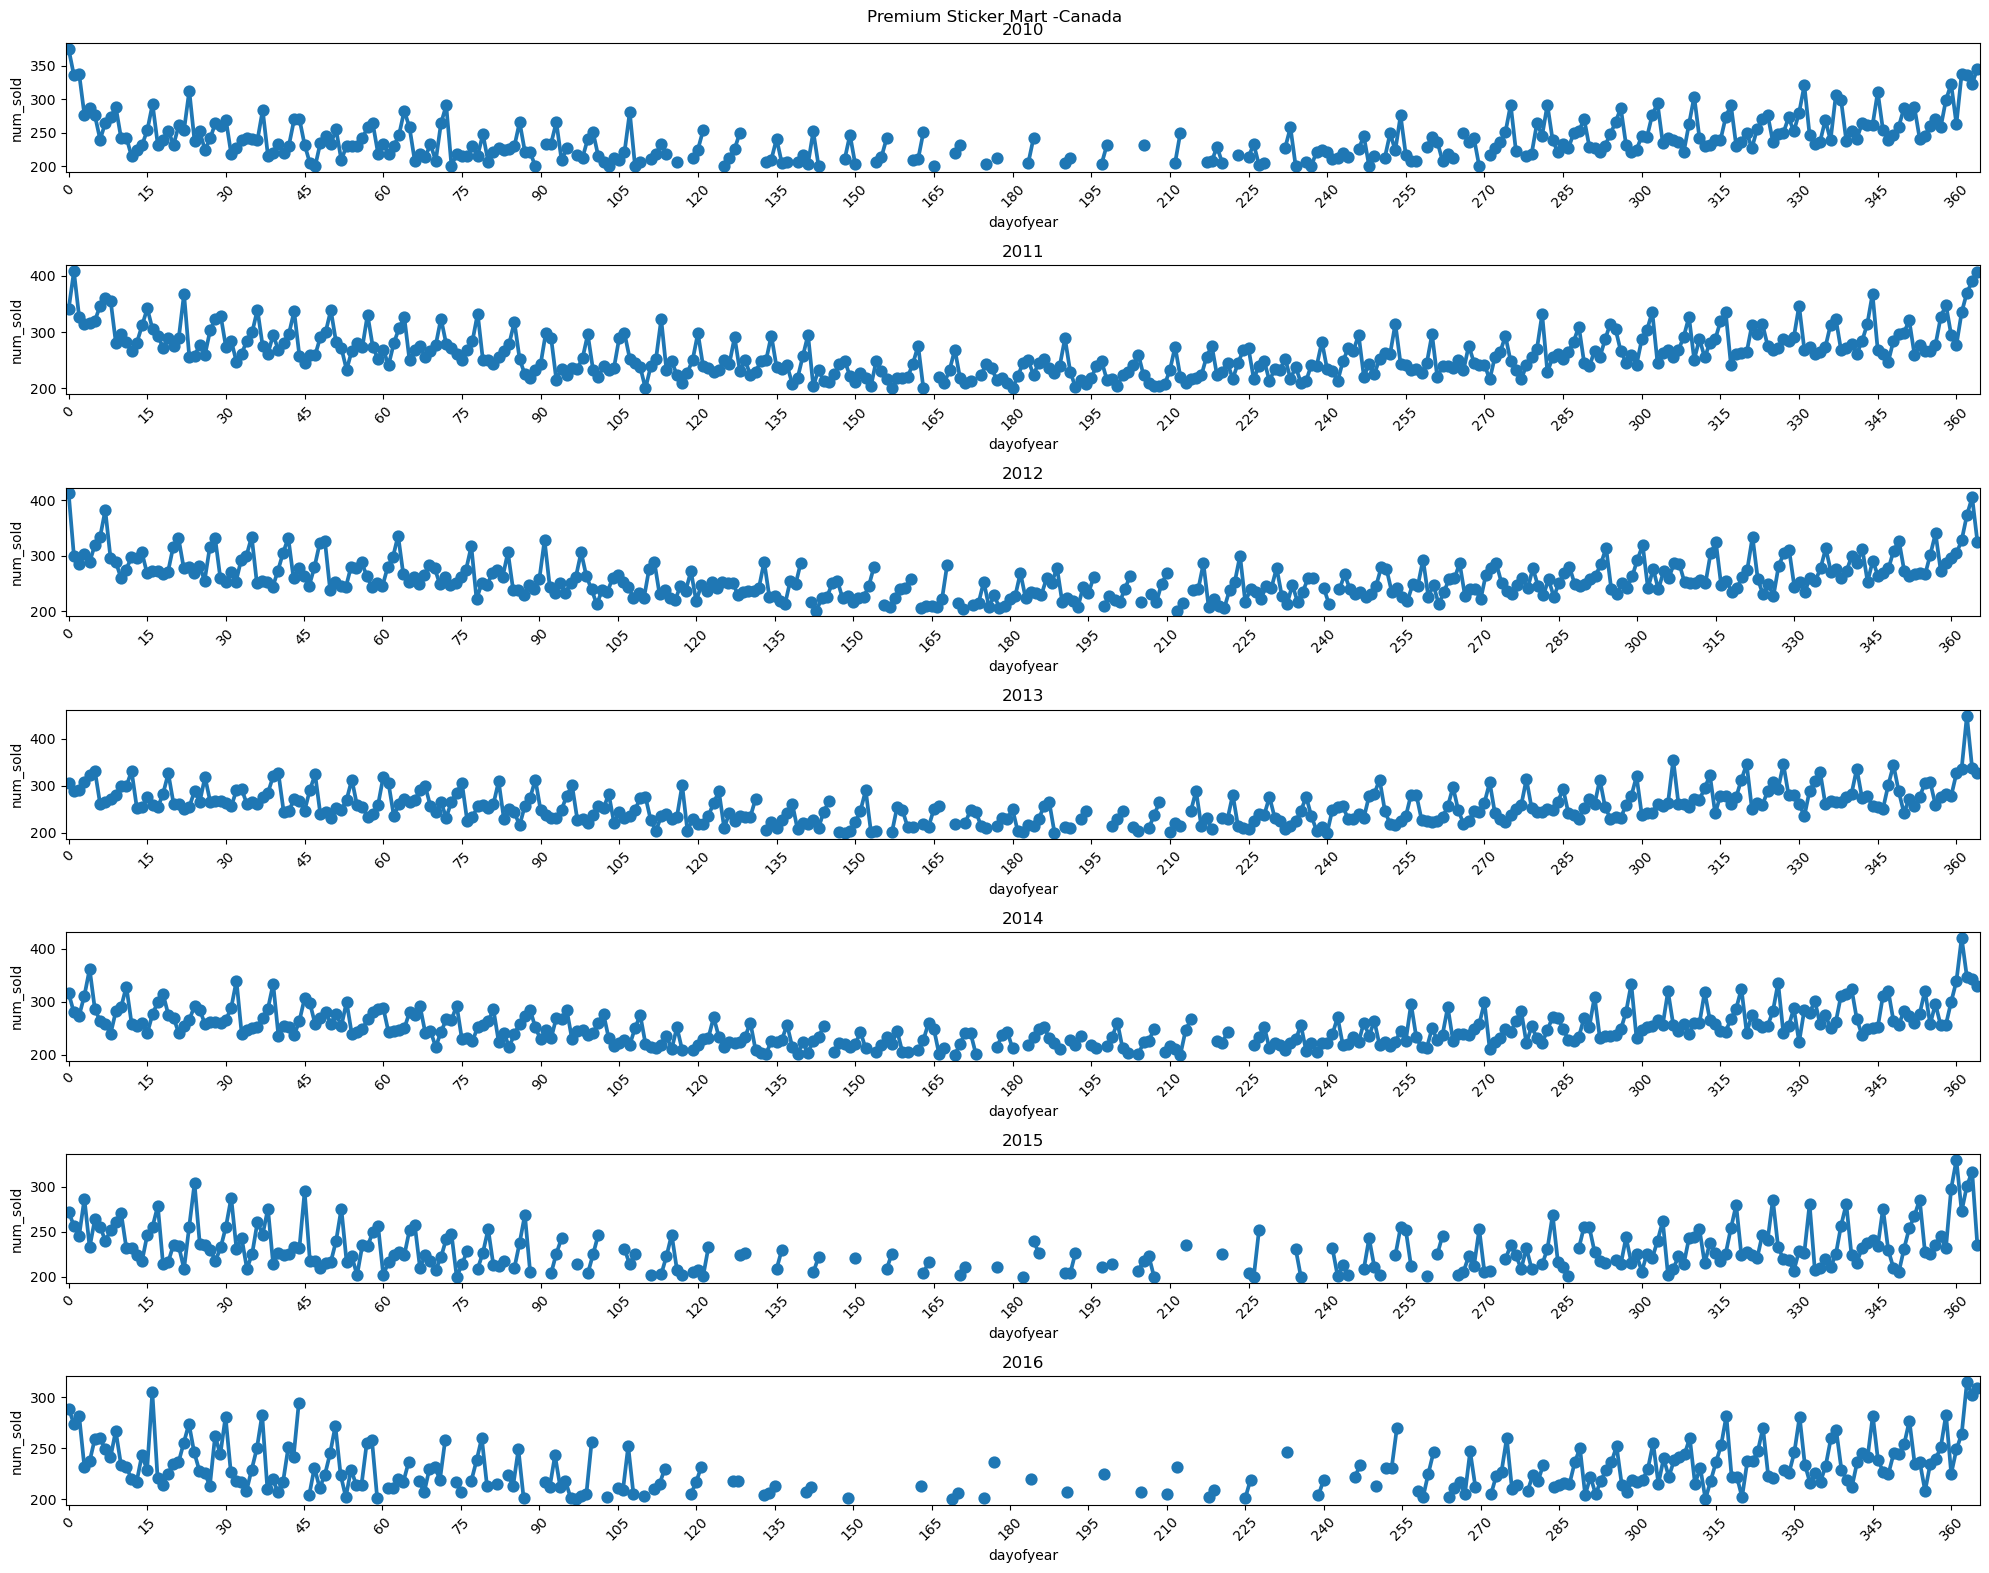

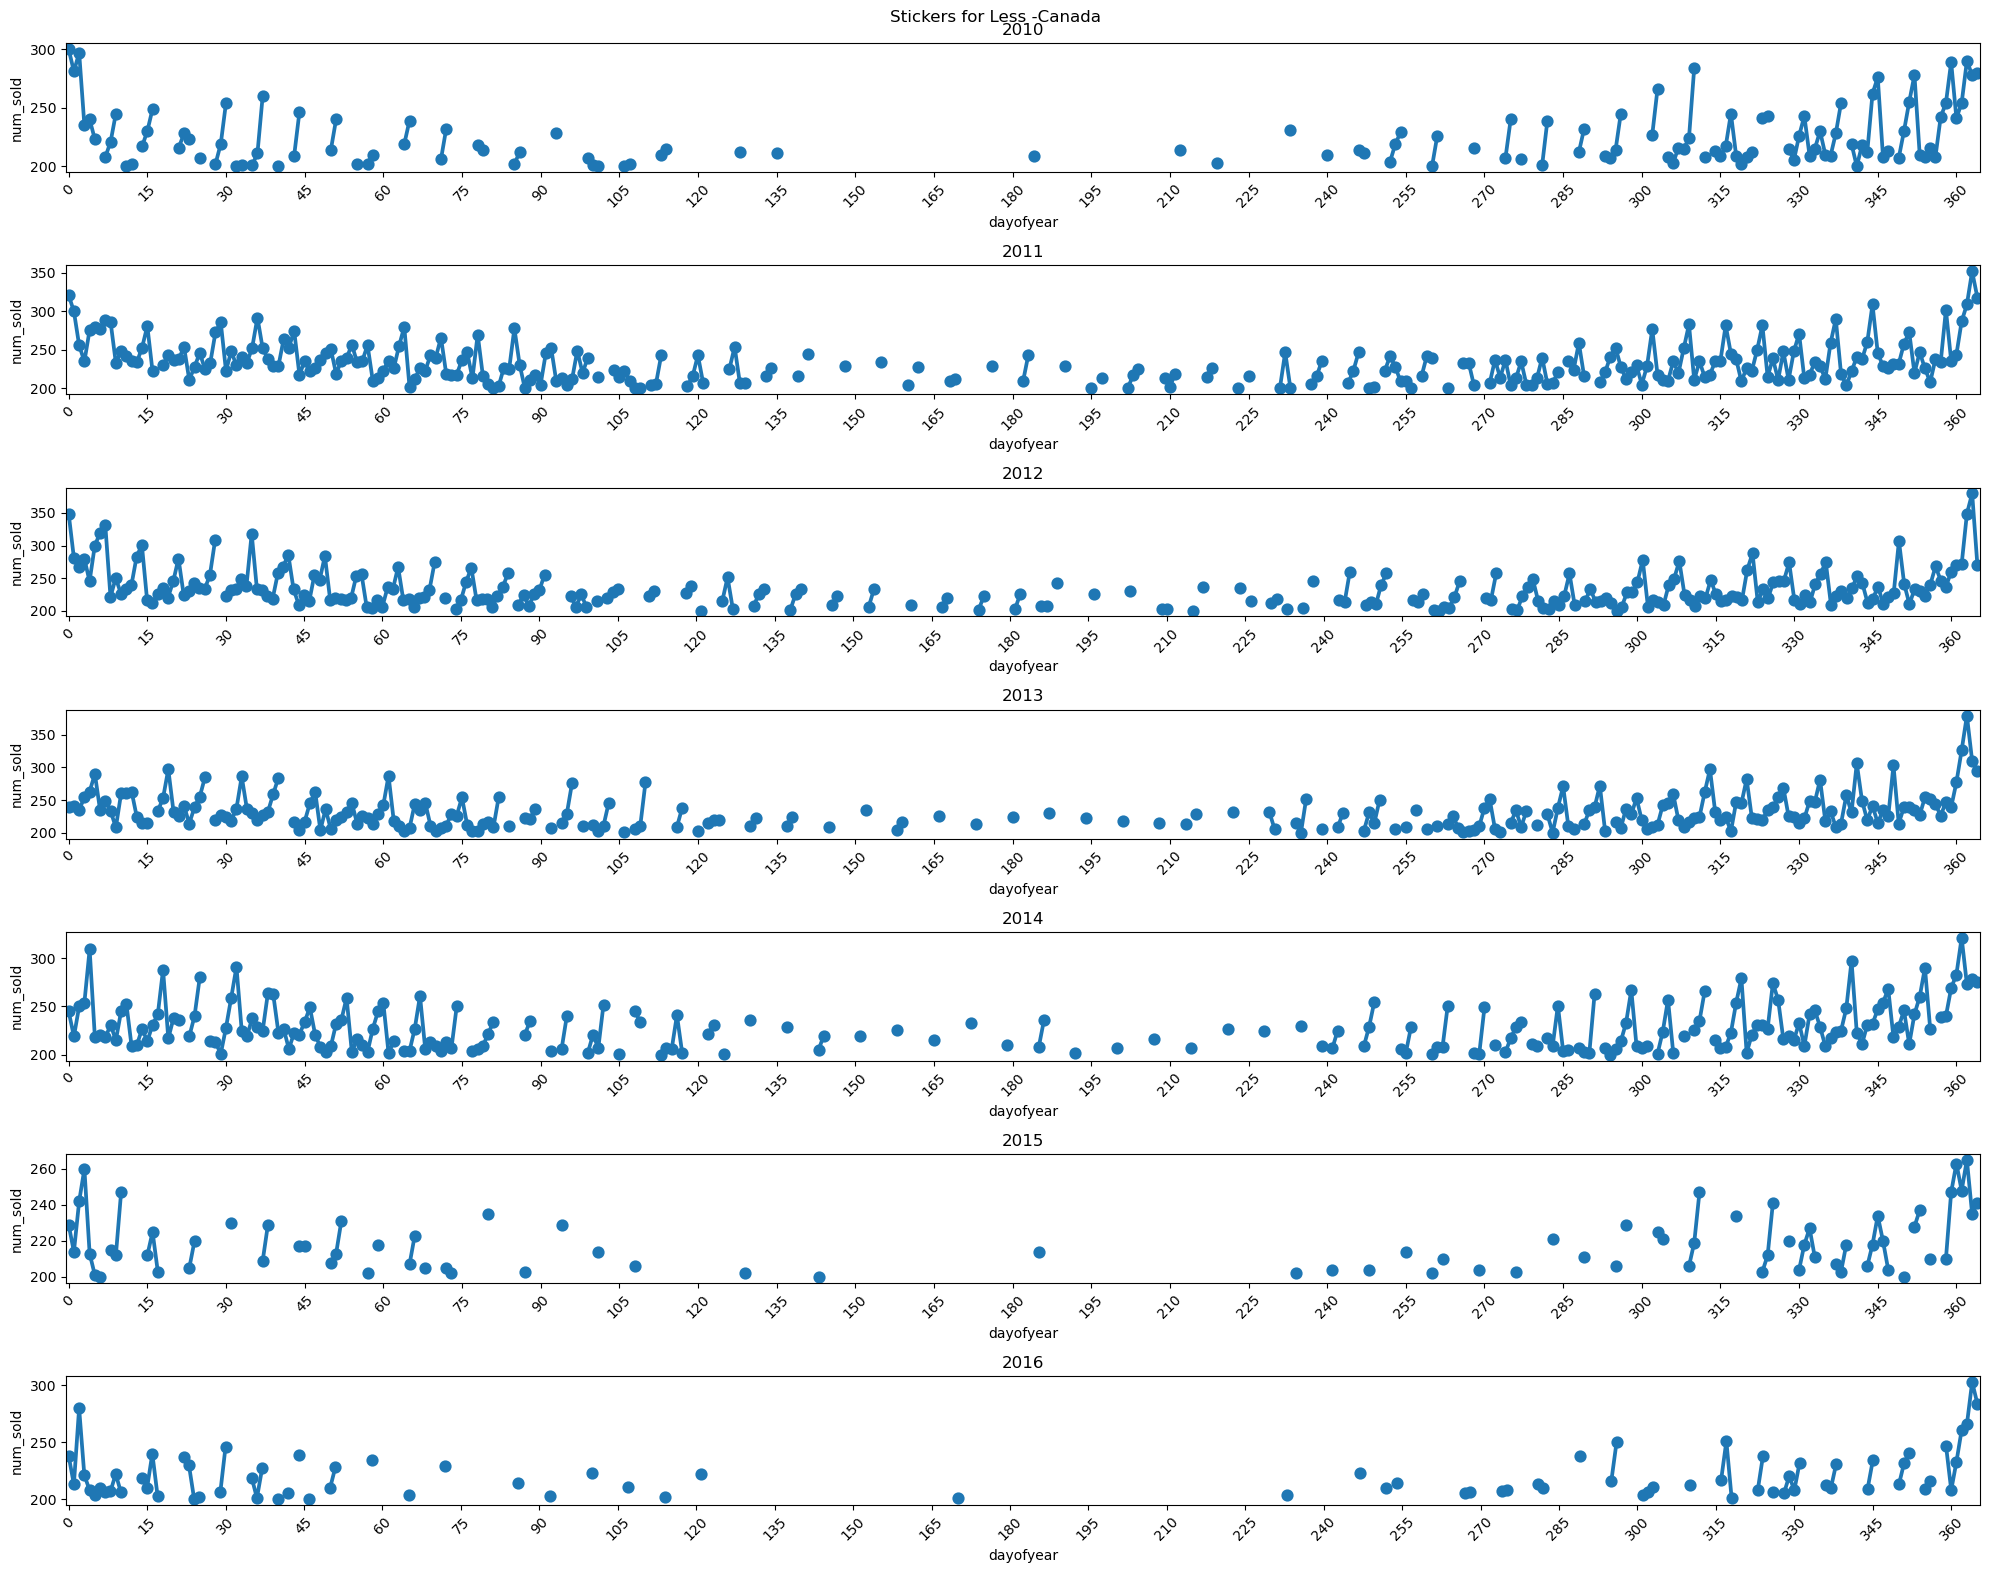

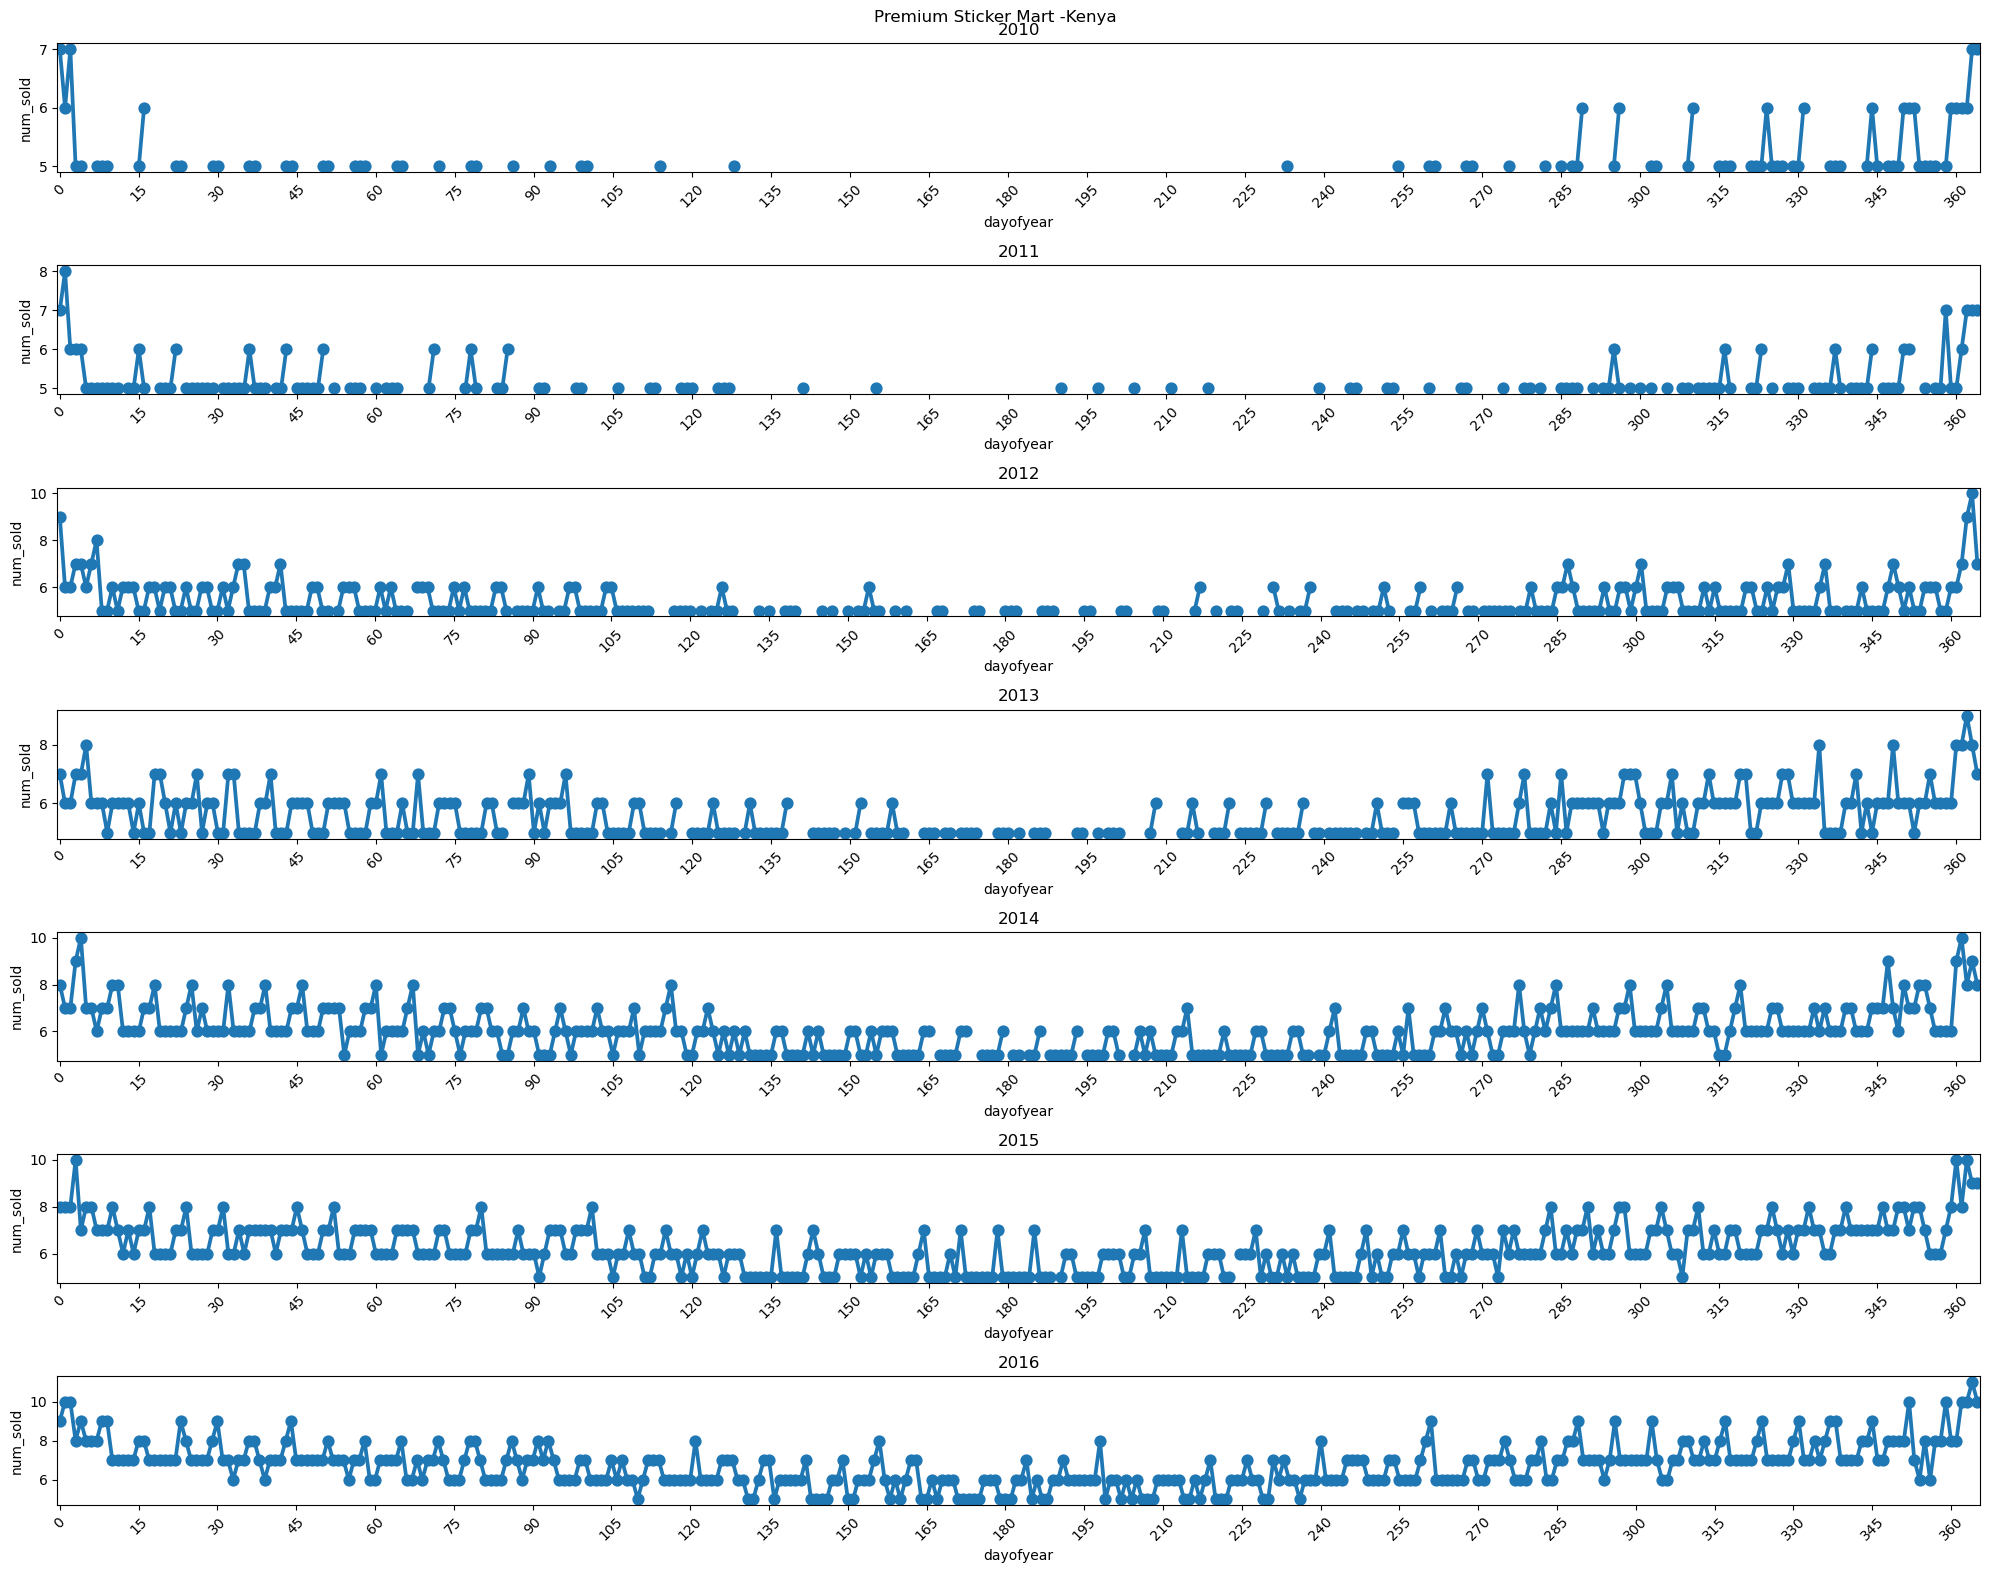

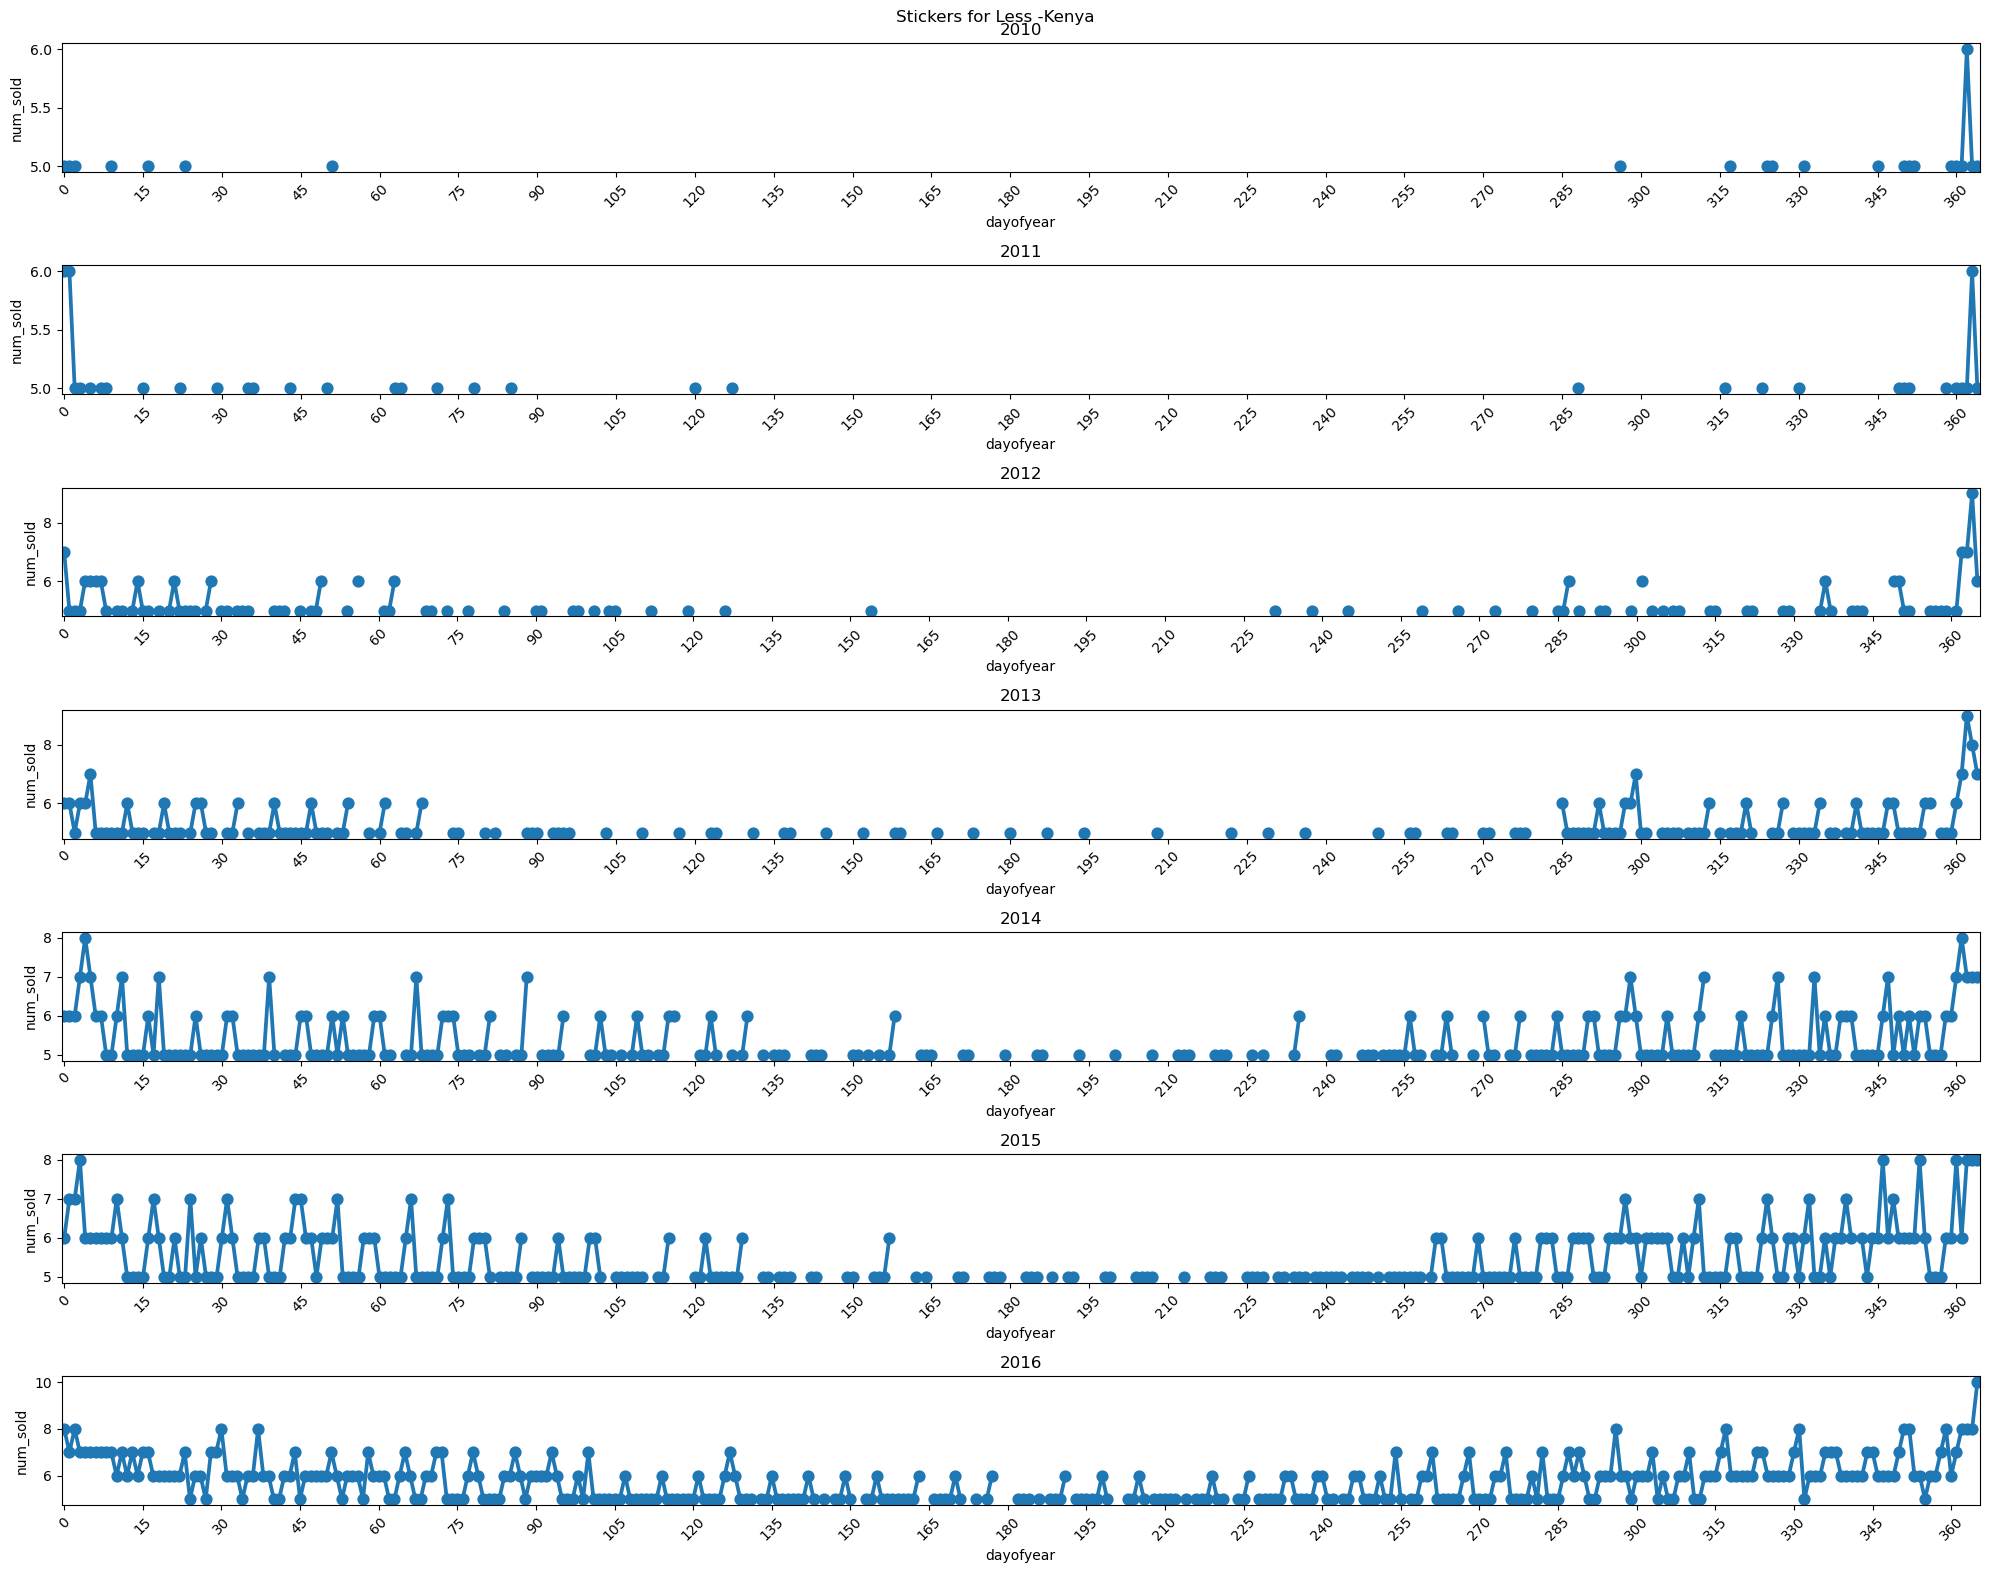

In [15]:
countries = ['Canada', 'Kenya']
stores = ['Premium Sticker Mart', 'Stickers for Less']
figures = []

for country in countries:
    for store in stores:
        fig, axs = plt.subplots(7,1, figsize=(20,16))
        for n, year in enumerate(train['year'].unique()):
            country_data = train[(train['country'] == country) & (train['store'] == store) & (train['product'] == "Holographic Goose") & (train['year'] == year)]
            sns.pointplot(x='dayofyear', y='num_sold',data=country_data, ax=axs[n])
            ticks = axs[n].get_xticks()[::15]
            axs[n].set_xticks(ticks,labels = ticks,rotation=45)
            axs[n].set_title(year) 
            plt.suptitle(store+" -"+country)
            plt.tight_layout()
            figures.append(fig)
    # plt.suptitle(country)  


In [16]:
# sns.barplot(pd.concat([train, pd.Series(train['num_sold'].isna(), name='sales_na')], axis = 1 ) , x= 'country', y = 'sales_na' )

In [21]:
pre_2010_canada_hg[pre_2010_canada_hg.isnull()]

,id,date,country,store,product,num_sold,year,month,dayofyear
10,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32410,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32500,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32590,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32680,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
trial

,num_sold
dayofyear,
1,375.0
2,336.0
3,338.0
4,277.0
5,287.0
...,...
361,263.0
362,338.0
363,336.0


In [35]:
pre_2010_canada_hg[pre_2010_canada_hg['num_sold'].isnull()]

,id,date,country,store,product,num_sold,year,month,spline_interpolation_3
dayofyear,,,,,,,,,
91,8110,2010-04-01,Canada,Premium Sticker Mart,Holographic Goose,NaN,2010,4,214.074716
97,8650,2010-04-07,Canada,Premium Sticker Mart,Holographic Goose,NaN,2010,4,232.867304
111,9910,2010-04-21,Canada,Premium Sticker Mart,Holographic Goose,NaN,2010,4,213.651717
116,10360,2010-04-26,Canada,Premium Sticker Mart,Holographic Goose,NaN,2010,4,210.698152
118,10540,2010-04-28,Canada,Premium Sticker Mart,Holographic Goose,NaN,2010,4,206.212946
...,...,...,...,...,...,...,...,...,...
251,22510,2010-09-08,Canada,Premium Sticker Mart,Holographic Goose,NaN,2010,9,210.318316
259,23230,2010-09-16,Canada,Premium Sticker Mart,Holographic Goose,NaN,2010,9,216.678480
266,23860,2010-09-23,Canada,Premium Sticker Mart,Holographic Goose,NaN,2010,9,232.814445


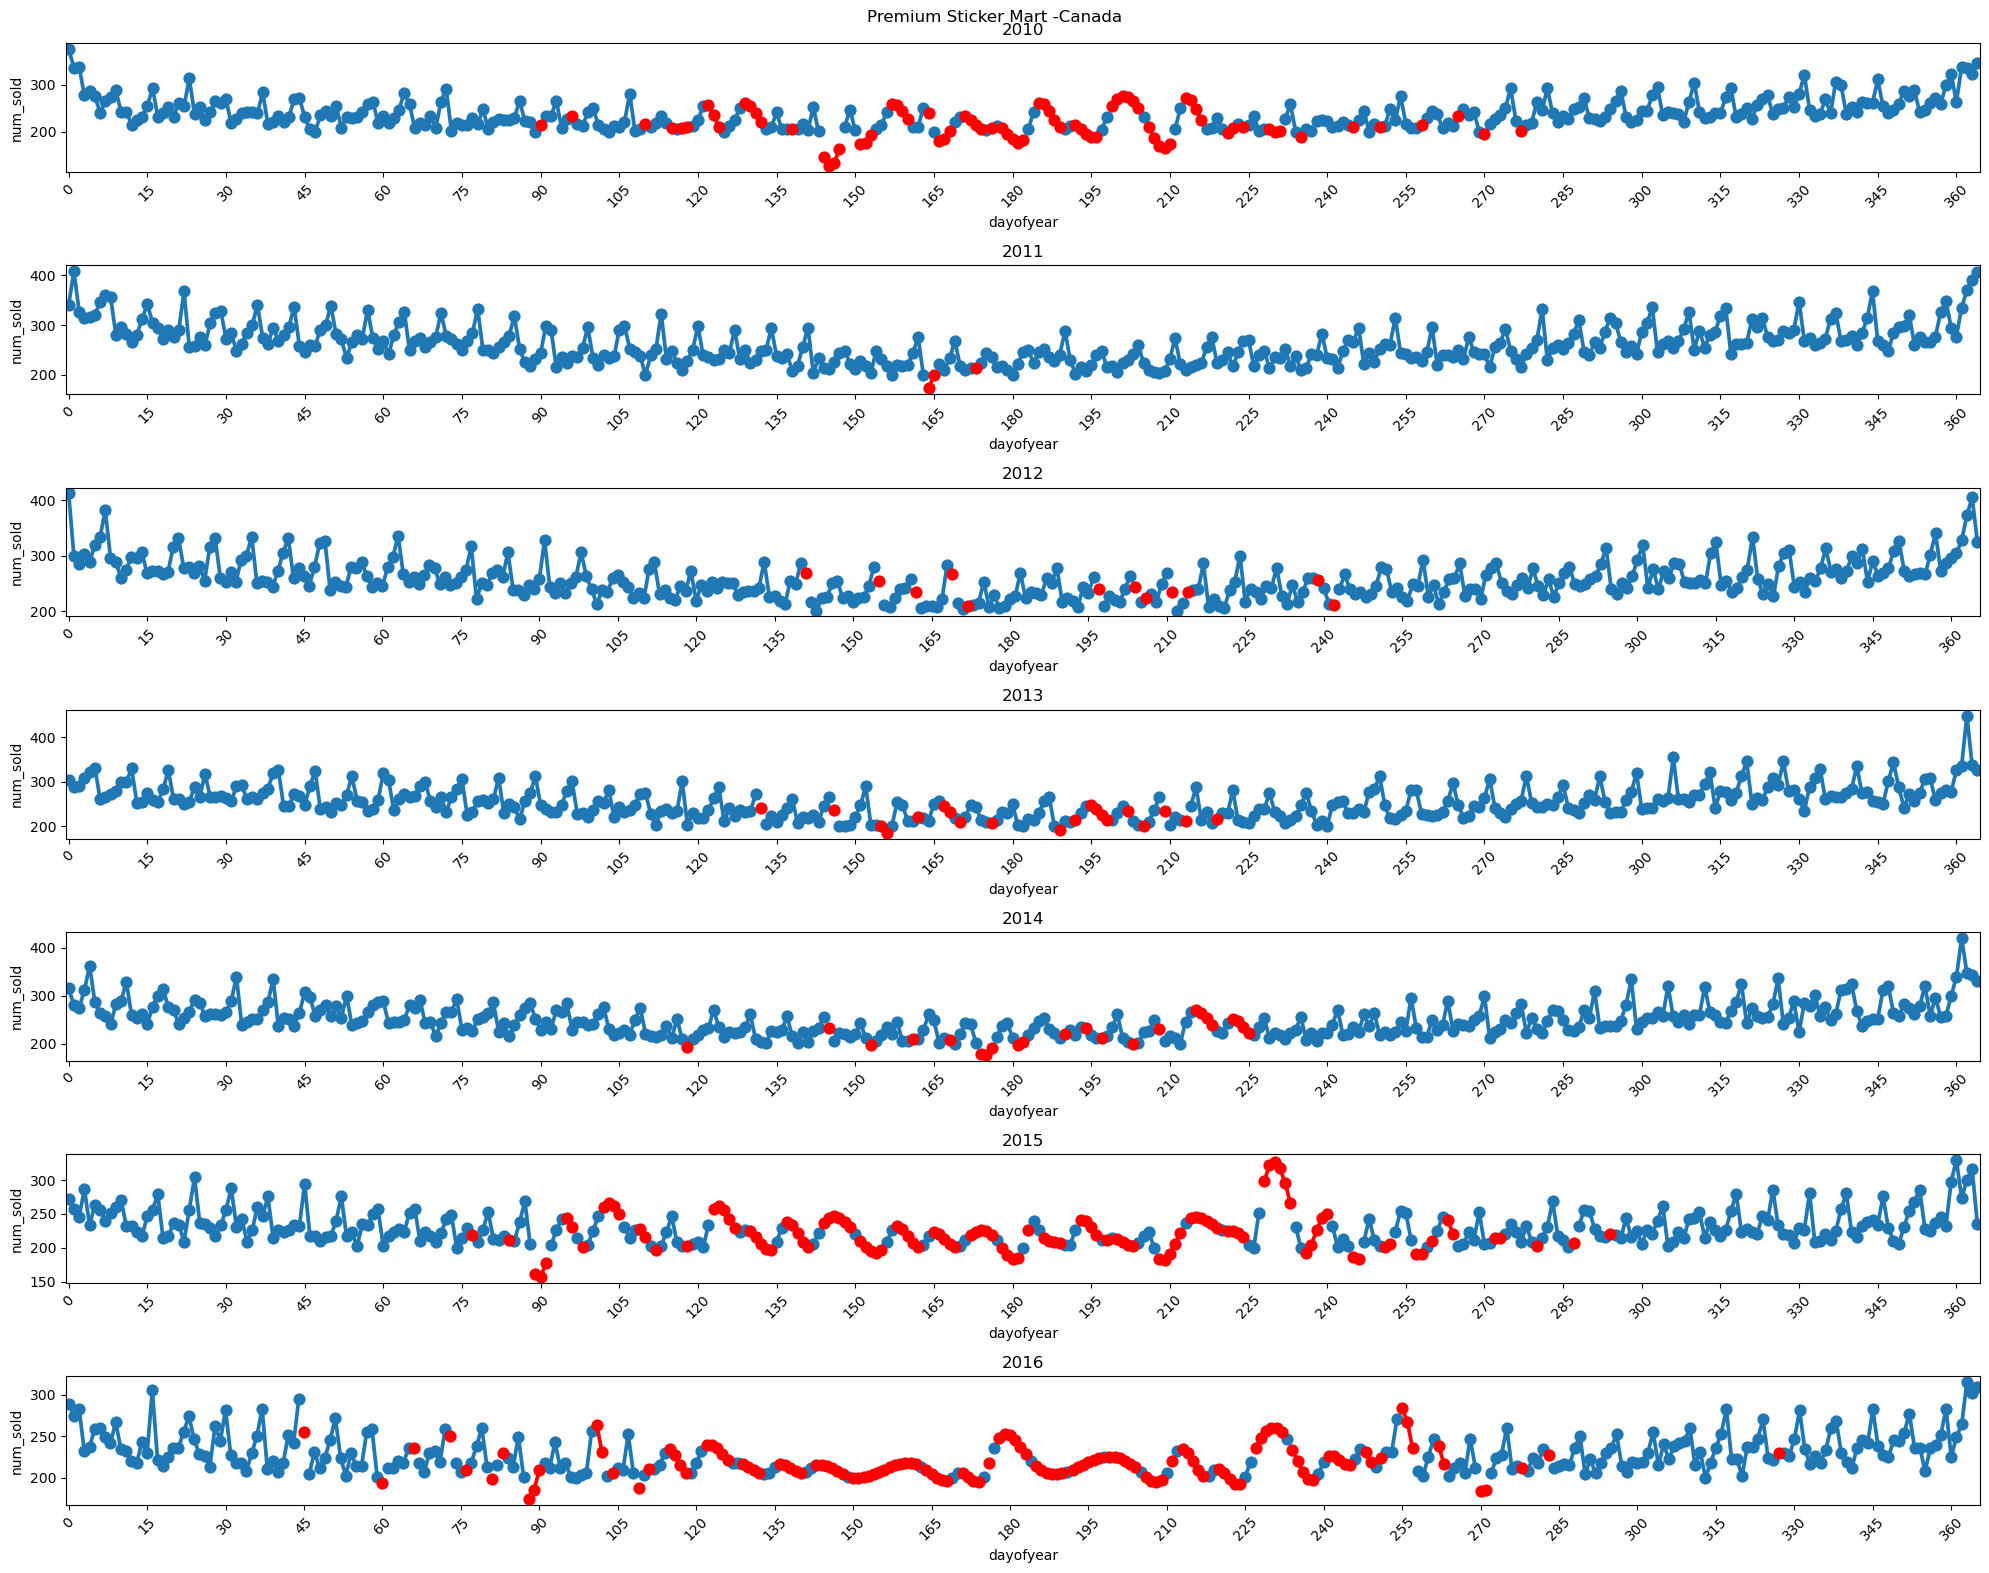

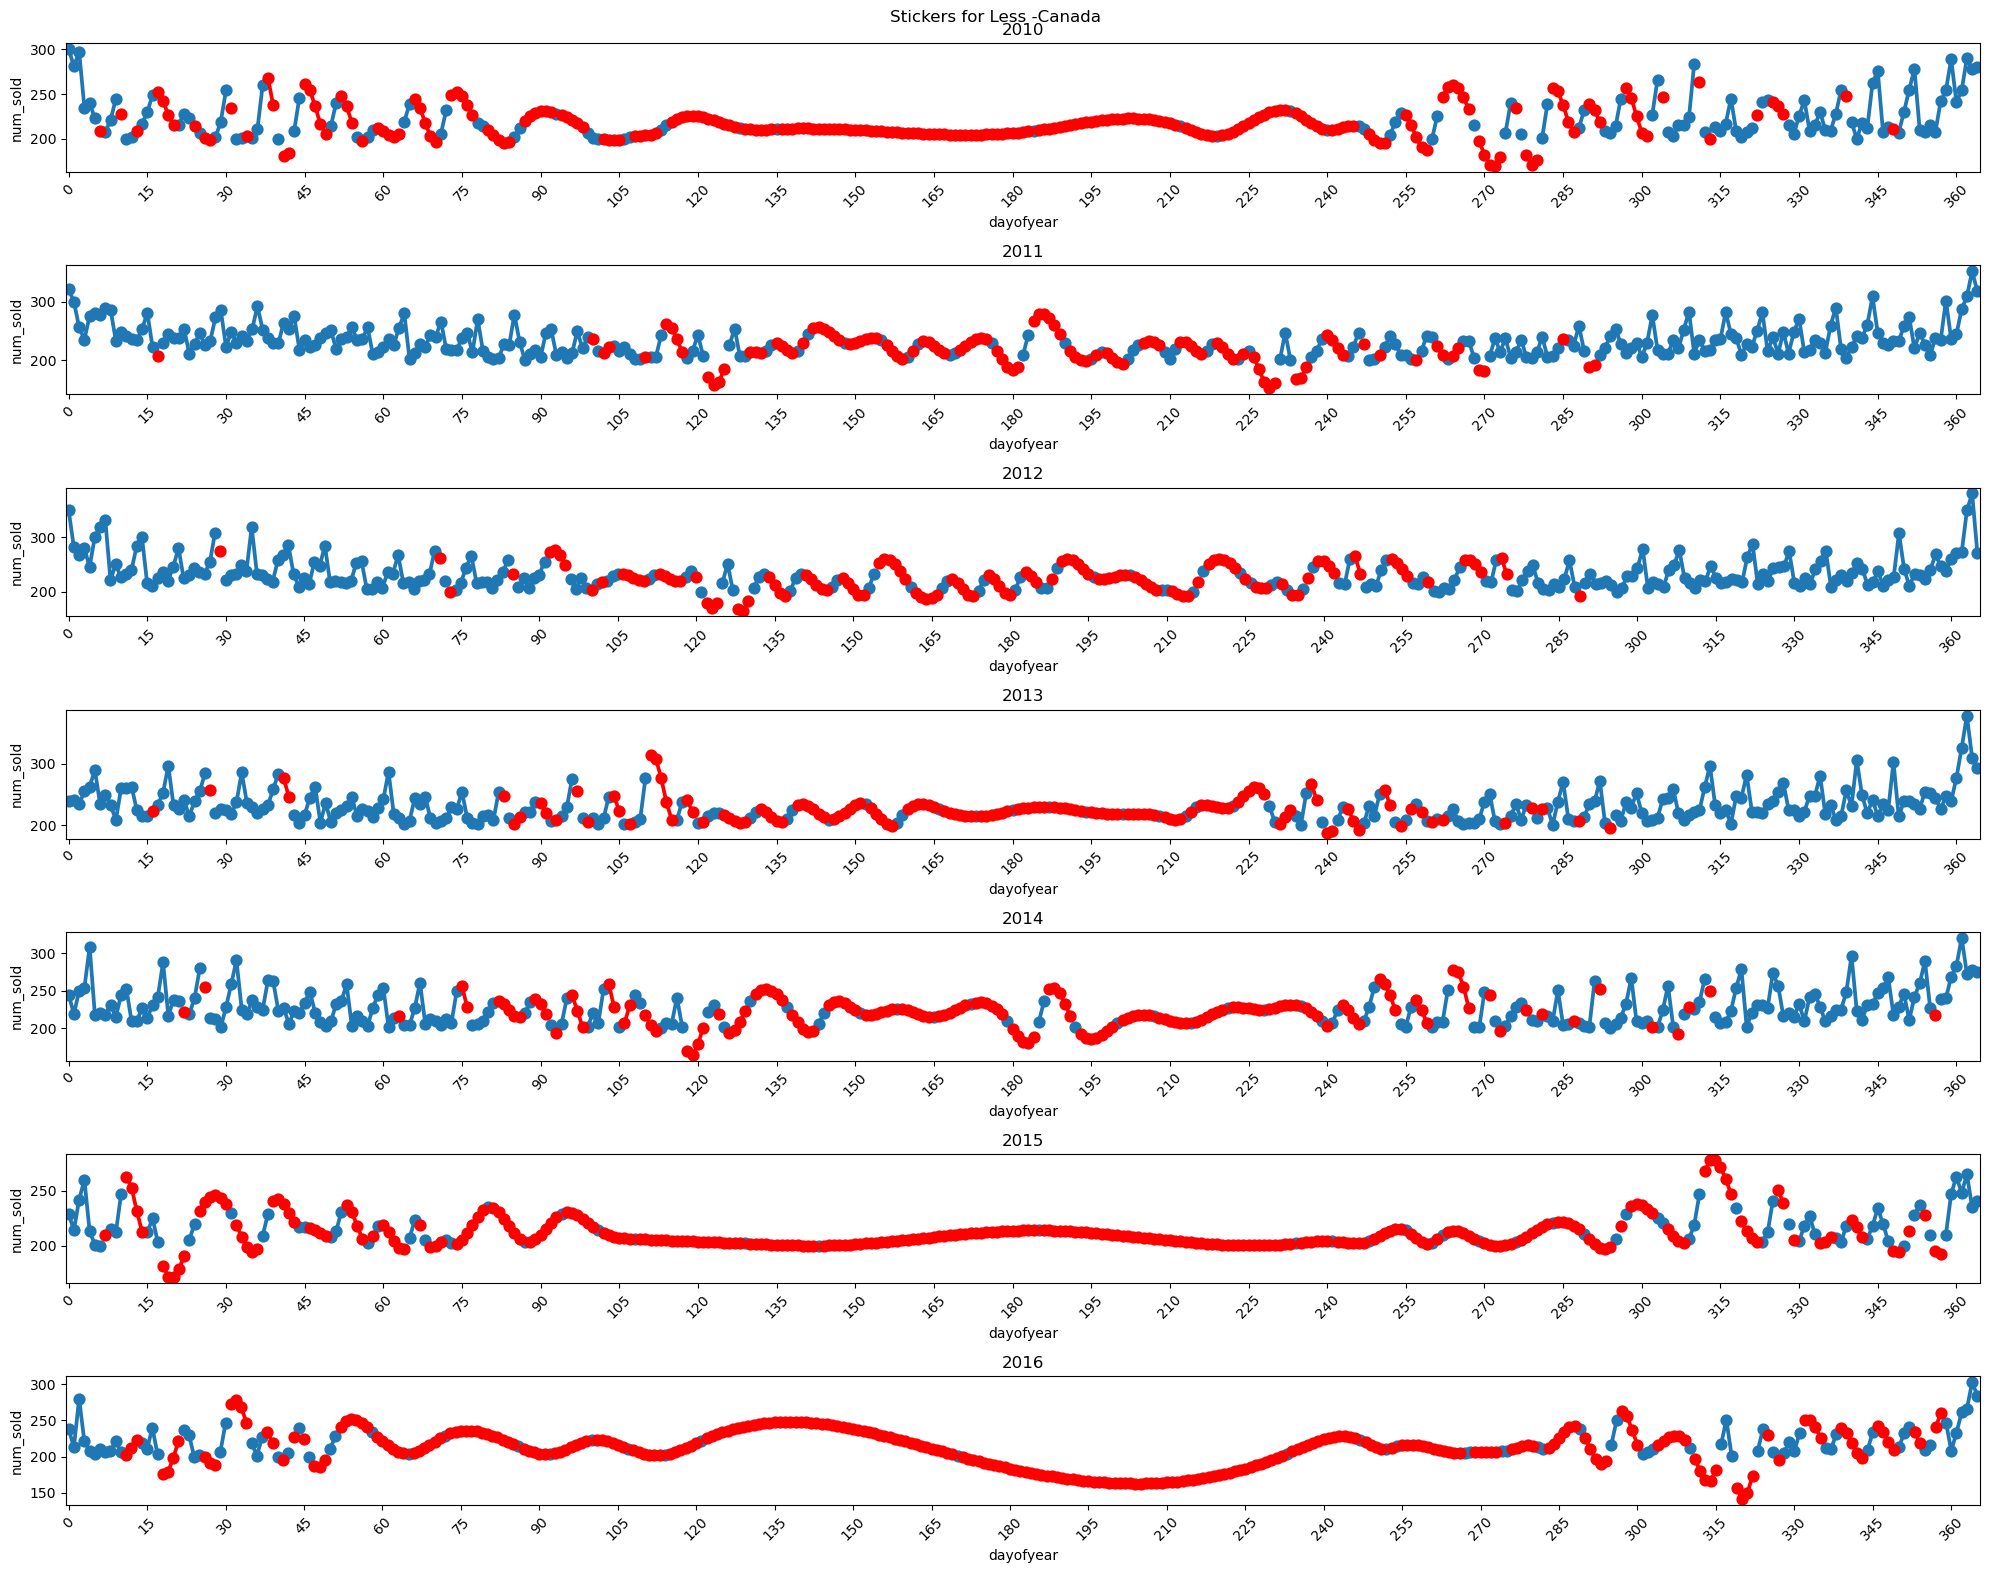

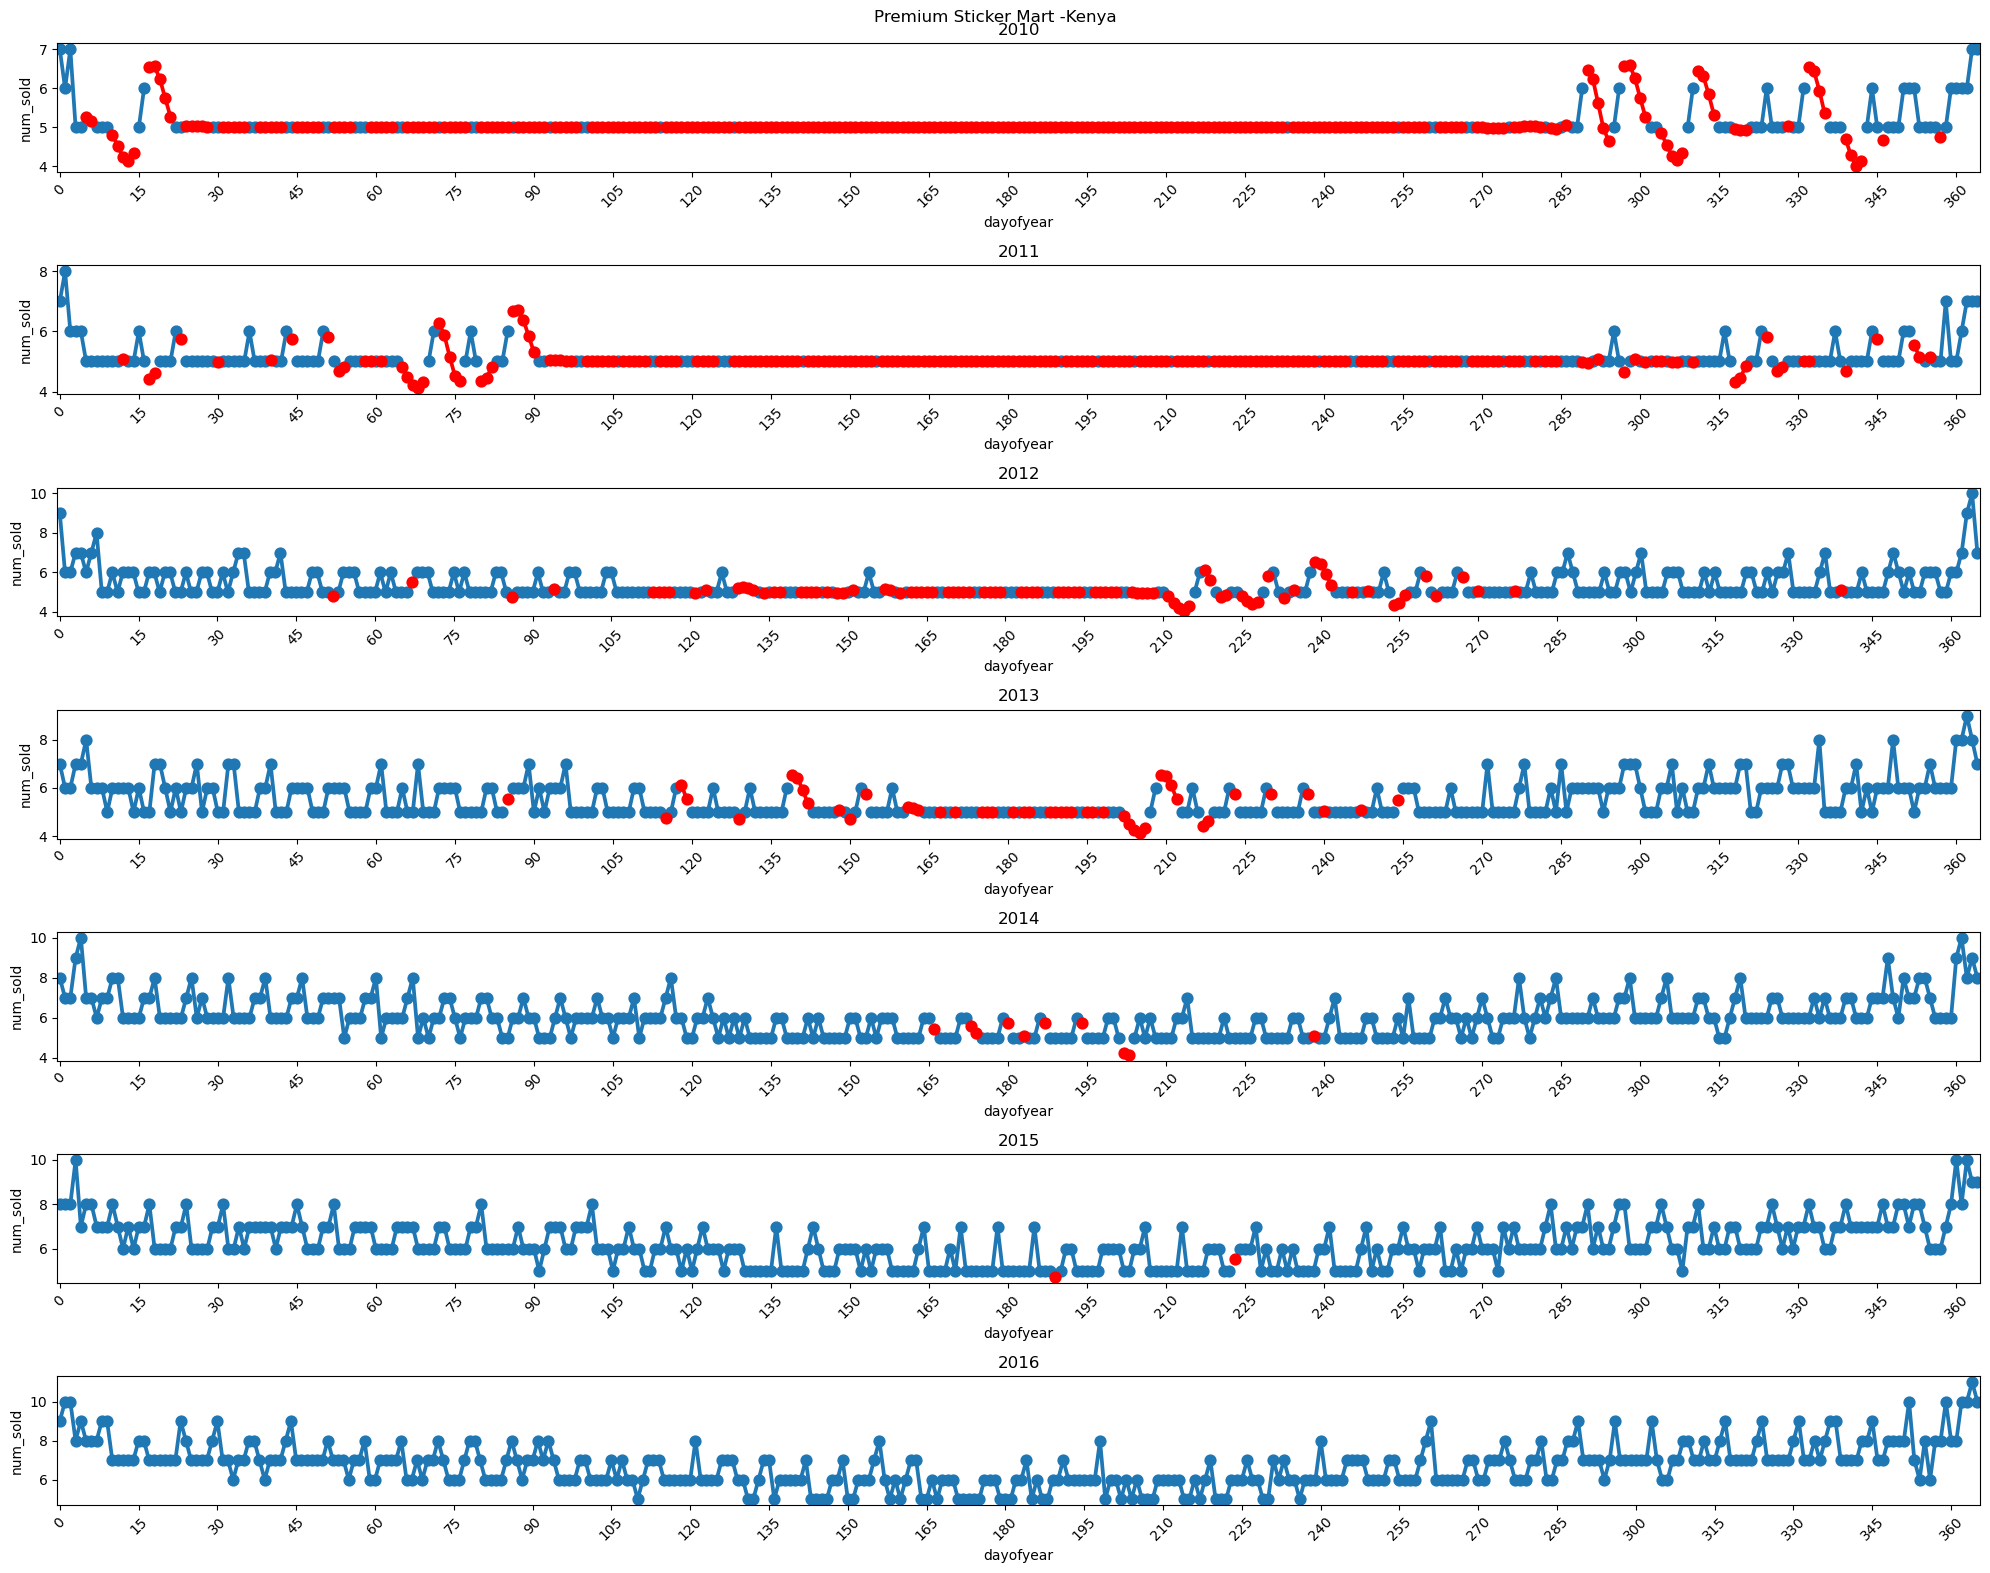

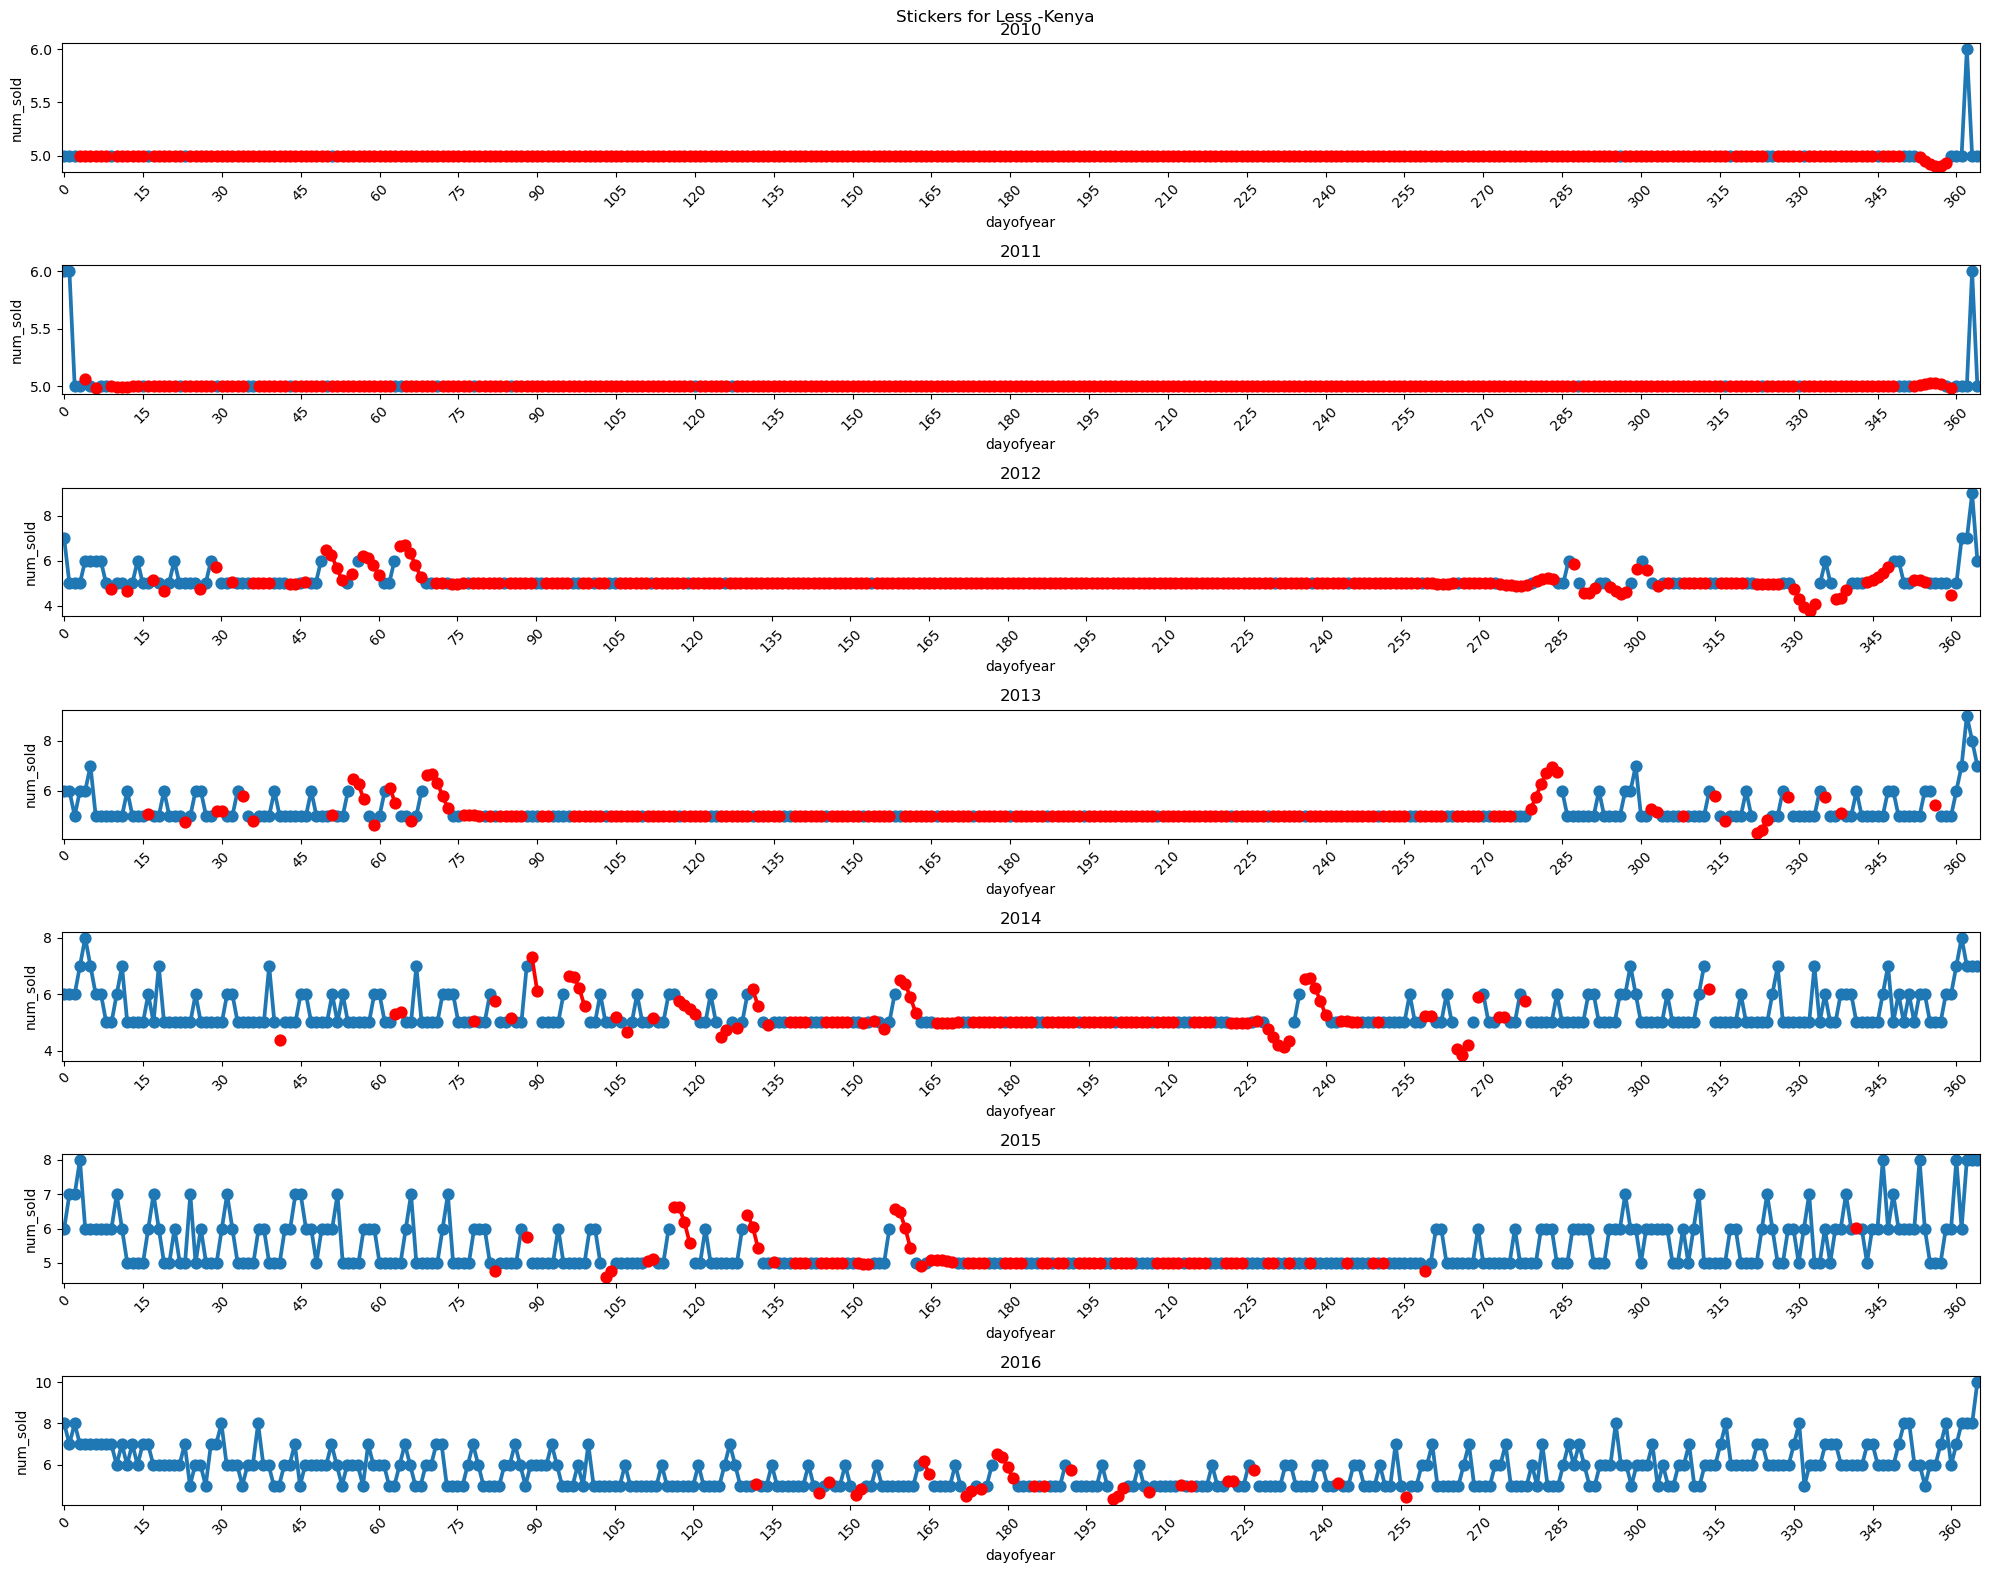

In [54]:
# countries = ['Canada', 'Kenya']
# stores = ['Premium Sticker Mart', 'Stickers for Less']
# figures = []

interpolation_figures = []
for country in countries:
    for store in stores:
        fig, axs = plt.subplots(7,1, figsize=(20,16))
        for n, year in enumerate(train['year'].unique()):
            country_data = train[(train['country'] == country) & (train['store'] == store) & (train['product'] == "Holographic Goose") & (train['year'] == year)].copy()
            country_data['dayindex'] = country_data['dayofyear']
            country_data = country_data.set_index('dayindex').sort_index()
            country_data['spline_interpolation_3']  = country_data['num_sold'].interpolate(method='cubicspline',order=3)
            sns.pointplot(x='dayofyear', y='num_sold',data=country_data, ax=axs[n])
            sns.pointplot(x='dayofyear', y='spline_interpolation_3',data=country_data[country_data['num_sold'].isnull()], color = 'red', ax=axs[n])
            ticks = axs[n].get_xticks()[::15]
            axs[n].set_xticks(ticks,labels = ticks,rotation=45)
            axs[n].set_title(year) 
            plt.suptitle(store+" -"+country)
            plt.tight_layout()
            interpolation_figures.append(fig)
    # plt.suptitle(country)  



# pre_2010_canada_hg = train[(train['country'] == 'Canada') & (train['store'] == 'Premium Sticker Mart') & (train['product'] == "Holographic Goose") & (train['year'] == 2010)].copy()
# pre_2010_canada_hg['dayindex'] = pre_2010_canada_hg['dayofyear']
# pre_2010_canada_hg = pre_2010_canada_hg.set_index('dayindex').sort_index()
# pre_2010_canada_hg['spline_interpolation_3']  = pre_2010_canada_hg['num_sold'].interpolate(method='piecewise_polynomial',order=3)

# plt.figure(figsize=(20,6))
# sns.pointplot(x='dayofyear', y='num_sold',data=pre_2010_canada_hg)
# sns.pointplot(x='dayofyear', y='spline_interpolation_3',data=pre_2010_canada_hg[pre_2010_canada_hg['num_sold'].isnull()], color = 'red')
# plt.xticks(pre_2010_canada_hg.index[::15],pre_2010_canada_hg.index[::15],rotation=45)

In [18]:
trial

,num_sold
dayofyear,
